<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/IonQ-%EC%96%91%EC%9E%90%ED%9A%8C%EB%A1%9C%EA%B8%B0%EC%B4%88-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!python -m pip install "qiskit-terra>=0.17.4"
!python -m pip install qiskit-aer
!python -m pip install qiskit-ionq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.5 MB/s eta 0:00:00


In [42]:
from qiskit_ionq import IonQProvider
ionq_provider = IonQProvider("hoE6a1L4O41FK0m4PHPtLu5kLxj6Jl6R")

# Show all backends:
print(ionq_provider.backends())

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [43]:
qpu_backend = provider.get_backend("ionq_simulator")

In [12]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.tools.visualization import plot_histogram

In [13]:
qc = QuantumCircuit(1, 1)
qc.rx(np.pi/3, qubit=0)
qc.measure(qubit=0, cbit=0)

In [14]:
qc.draw()

┌─────────┐┌─┐
  q: ┤ Rx(π/3) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

{'1': 1024}


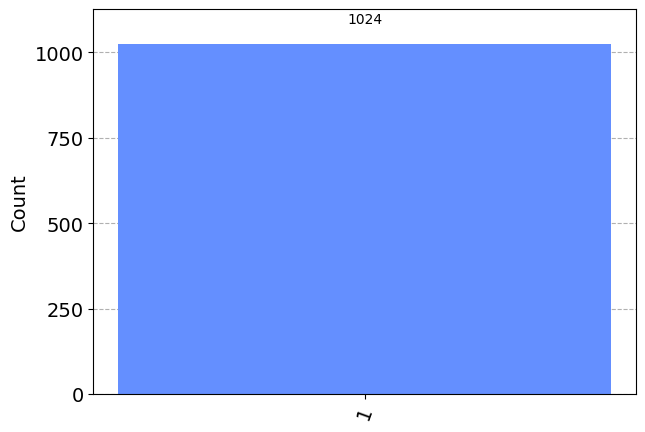

In [34]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()

counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [70]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
qc.measure(0,0)
qc.draw()

┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

{'1': 257, '0': 767}


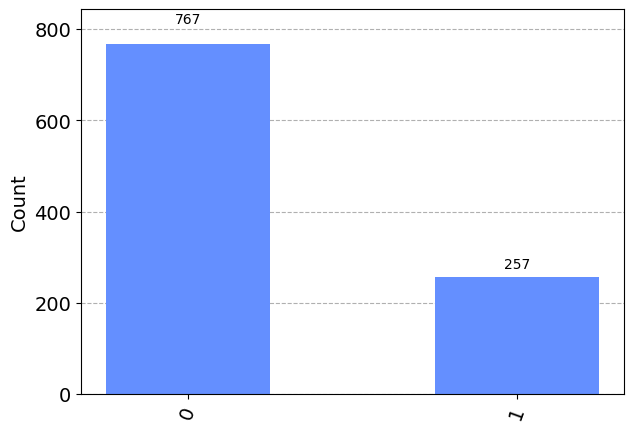

In [40]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()

counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [69]:
qc = QuantumCircuit(1, 1)
qc.rx(np.pi/3, 0)
qc.measure(0, 0)

In [65]:
qc.draw()

┌─────────┐┌─┐
  q: ┤ Rx(π/3) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

In [72]:
backend = ionq_provider.get_backend("ionq_simulator")
job = execute(qc, backend)

In [73]:
from qiskit.providers.jobstatus import JobStatus
import time

while job.status() is not JobStatus.DONE:
  print("Job status is", job.status())
  time.sleep(1)
###while

print("Job status is", job.status())

Job status is JobStatus.DONE


{'0': 486, '1': 538}


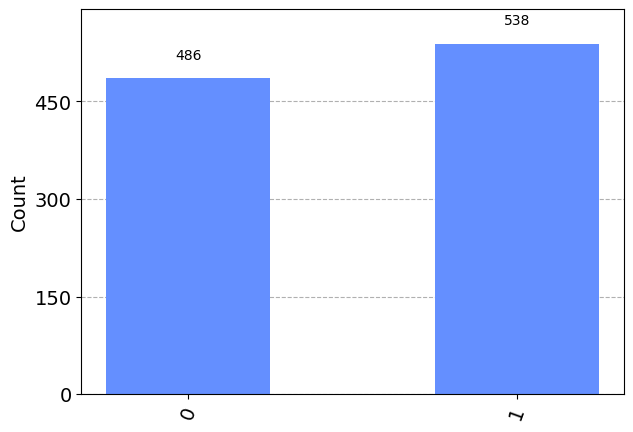

In [75]:
#result = job.result()
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)

In [77]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.h(0)
qc.measure(0,0)
qc.draw()

┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

In [78]:
backend = ionq_provider.get_backend("ionq_simulator")
job = execute(qc, backend)

from qiskit.providers.jobstatus import JobStatus
import time

while job.status() is not JobStatus.DONE:
  print("Job status is", job.status())
  time.sleep(1)
###while

print("Job status is", job.status())


Job status is JobStatus.INITIALIZING
Job status is JobStatus.INITIALIZING
Job status is JobStatus.QUEUED
Job status is JobStatus.DONE


{'0': 488, '1': 536}


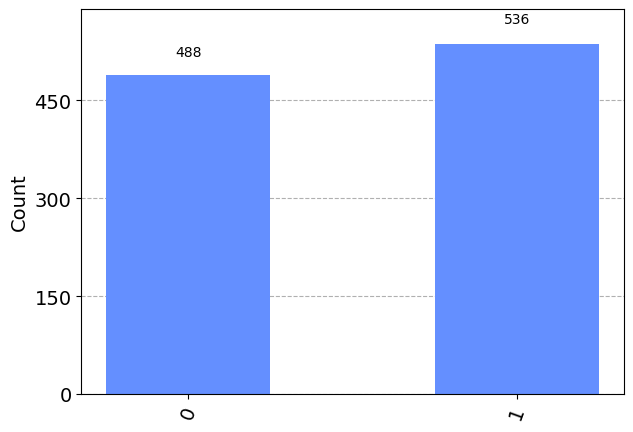

In [79]:
#result = job.result()
counts = job.result().get_counts()

print(counts)
plot_histogram(counts)

In [80]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

In [82]:
qc.decompose().draw()

┌─────────┐
q: ┤ U2(0,π) ├
   └─────────┘

In [83]:
qc = QuantumCircuit(1)
qc.t(0)
qc.draw()

┌───┐
q: ┤ T ├
   └───┘

In [85]:
qc.decompose().draw()

┌─────────┐
q: ┤ U1(π/4) ├
   └─────────┘

In [86]:
qc.decompose().decompose().draw()

┌─────────────┐
q: ┤ U3(0,0,π/4) ├
   └─────────────┘